# Rental Prices- Exploratory Data Analysis 

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading data and printing out a few lines. 
df = pd.read_csv('rentals_cleaned_csv', index_col=0)

### Univariate Exploration

#### Let's start our exploration by looking at the main variable of interest: price to see its distribution type: skewed or symmetric?

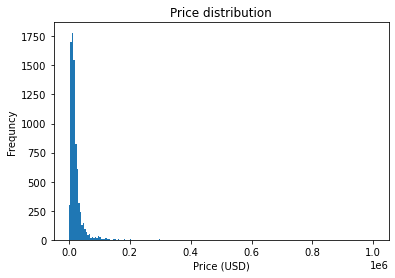

In [2]:
# univariate plot of price
bins = np.arange(0, df['price'].max()+5000, 5000)
plt.hist(df.price, bins = bins)
plt.xlabel('Price (USD)')
plt.ylabel('Frequncy')
plt.title('Price distribution');

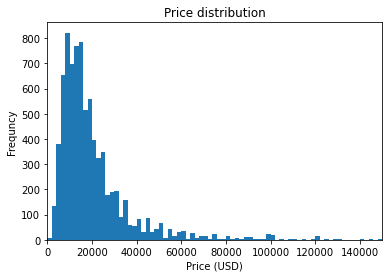

In [3]:
# Setting Xlimit to get rid of outliers effect 
bins = np.arange(0, df['price'].max()+2000, 2000)
plt.hist(df.price, bins = bins)
plt.xlabel('Price (USD)')
plt.ylabel('Frequncy')
plt.title('Price distribution')
plt.xlim((0,150000));

Price distribution is skewed, most pooular prices are under 20000$

#### Next, create a plot of numerical factors affecting price: bathrooms, bedrooms, and find if there is an interesting pattern in these values?

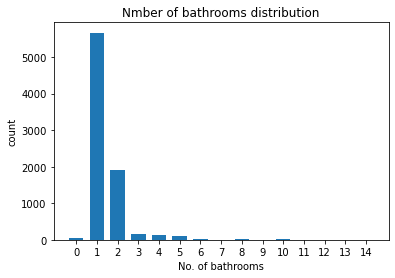

In [4]:
# univariate plot of bathrooms
bins = np.arange(-.5, df['bathrooms'].max()+1, 1)
plt.hist(data = df, x = 'bathrooms', bins = bins, rwidth = 0.7)
plt.xticks(np.arange(0, 14+1, 1))
plt.xlabel('No. of bathrooms')
plt.title('Nmber of bathrooms distribution')
plt.ylabel('count');

Most popular rentals have only one to two bathrooms

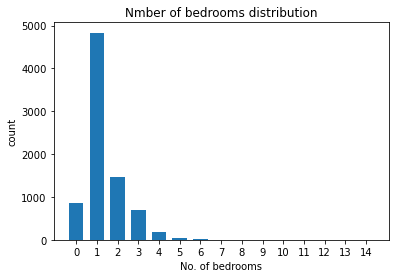

In [5]:
# univariate plot of bedrooms
bins = np.arange(-.5, df['bedrooms'].max()+1, 1)
plt.hist(data = df, x = 'bedrooms', bins = bins, rwidth = 0.7)
plt.xticks(np.arange(0, 14+1, 1));
plt.xlabel('No. of bedrooms')
plt.title('Nmber of bedrooms distribution')
plt.ylabel('count');

Most popular rentals have only one to two bedrooms

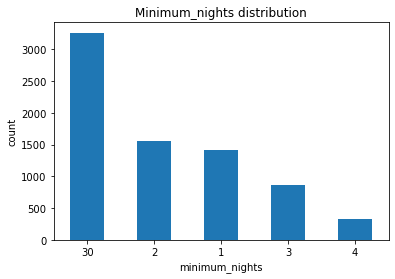

In [6]:
# univariate plot of minimum_nights
df.minimum_nights.value_counts().head().plot(kind='bar')
plt.xlabel('minimum_nights')
plt.ylabel('count')
plt.title('Minimum_nights distribution')
plt.xticks(rotation=0);

We see that most of rentals are month rentals, follwoed by few 2 to 3 days rentals.

##### Now, let's move on to exploring the other categorical factors: room type, and property type. 

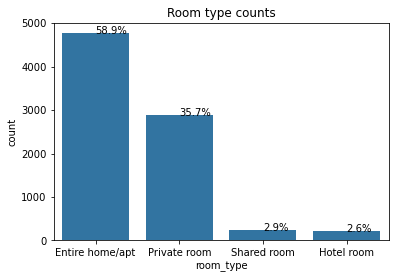

In [7]:
# univariate plot of rentals room type
base_color = sns.color_palette()[0]
type_order = df.room_type.value_counts().index
n_rentals = df.room_type.value_counts().sum()

# Type_counts contains the frequency of unique values in the `property_type` column in decreasing order.
type_counts = df.room_type.value_counts() 

sns.countplot(data=df, x='room_type', color=base_color, order=type_order);
plt.title('Room type counts')

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_rentals)
    # Print the string value on the bar. 
    plt.text(i,count+50, pct_string, va='center')

# Specify the figure size in inches, for both X, and Y axes
plt.rcParams['figure.figsize'] = 12,8

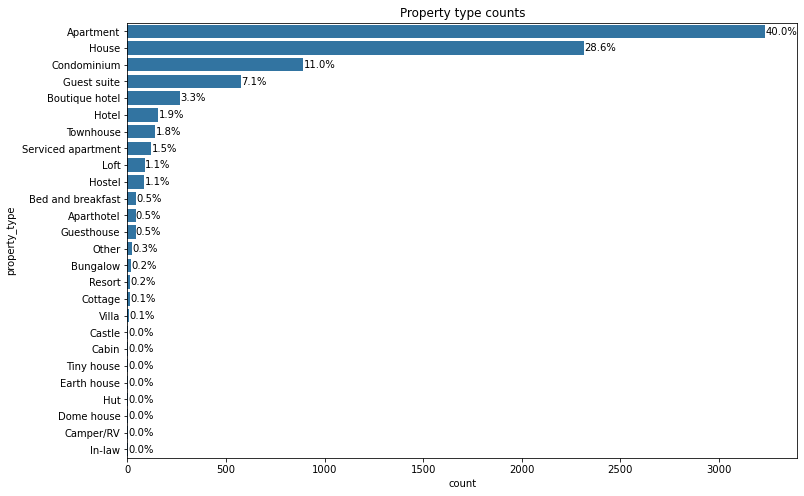

In [8]:
# univariate plot of rentals property type
base_color = sns.color_palette()[0]
type_order = df.property_type.value_counts().index
n_rentals = df.property_type.value_counts().sum()

# Type_counts contains the frequency of unique values in the `property_type` column in decreasing order.
type_counts = df.property_type.value_counts() 

sns.countplot(data=df, y='property_type', color=base_color, order=type_order);
plt.title('Property type counts')

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_rentals)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

# Specify the figure size in inches, for both X, and Y axes
plt.rcParams['figure.figsize'] = 12,8

Most common room and property type are the apartment type for both the room and the property. 

### Bivariate Exploration

##### Lets start with the numerical values effect on price

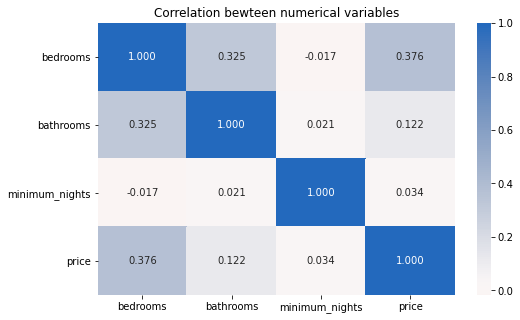

In [9]:
# correlation plot
numeric_vars = ['bedrooms','bathrooms', 'minimum_nights', 'price']
categoric_vars = ['room_type', 'property_type']
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation bewteen numerical variables')
plt.show()

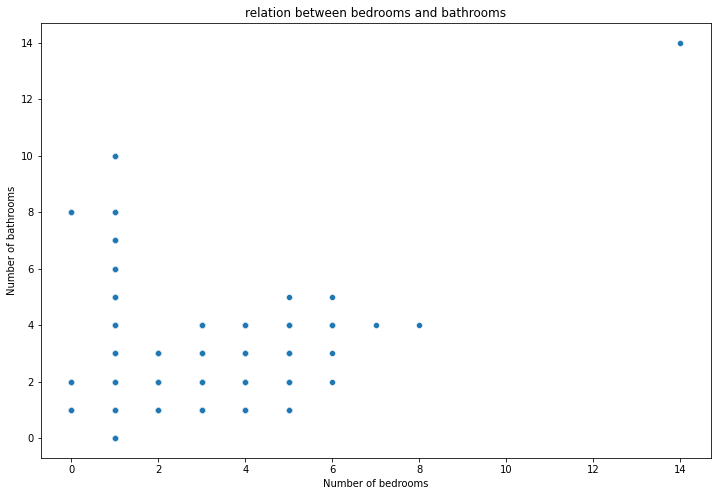

In [10]:
# Visulizing the relation between bedrooms and bathrooms 
sns.scatterplot(data = df, x = 'bedrooms', y = 'bathrooms', ci=False)
plt.xlabel('Number of bedrooms')
plt.ylabel('Number of bathrooms')
plt.title('relation between bedrooms and bathrooms');

We can see that as the number of bedrooms increases the number of bathroom increases

In [11]:
# Define a function plot_line_heat() 
def plot_scatter_heat(df, price, column):
    """ Shows the relation between price and the other numerical column by returning a heat map and a scatterplot"""
    plt.figure(figsize = [18, 6])
    plt.suptitle('relation between price and ' + column);

    # PLOT ON LEFT
    plt.subplot(1, 2, 1)
    sns.scatterplot(data = df, x = column, y = price, ci=False)
    plt.xlabel('Number of '+ column)
    plt.ylabel('Price')

    # PLOT ON RIGHT
    plt.subplot(1, 2, 2)
    plt.hist2d(data = df, x = column, y = price, cmin=0.5, cmap='viridis_r')
    plt.colorbar()
    plt.xlabel('Number of '+ column)
    plt.ylabel('Price (USD)')

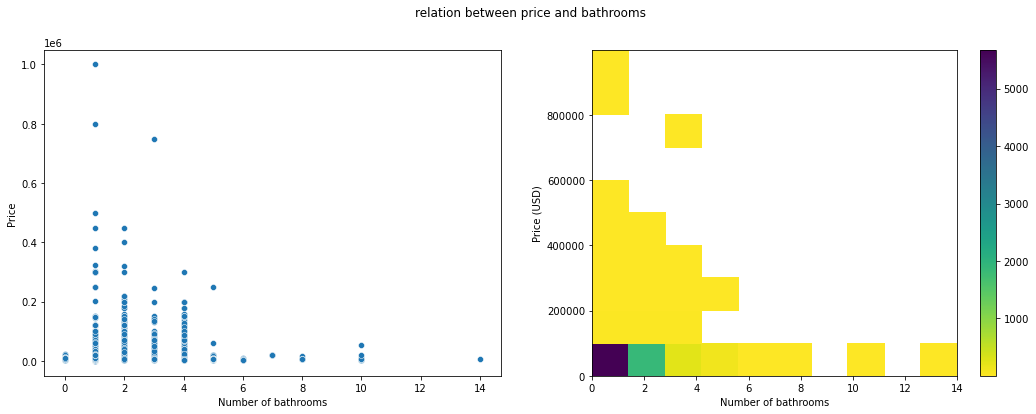

In [12]:
# The relation between price and bathrooms 
plot_scatter_heat(df, 'price', 'bathrooms')

There is no strong relation bewtten price and number of bathrooms, this is what we concluded before from the statstical approach.

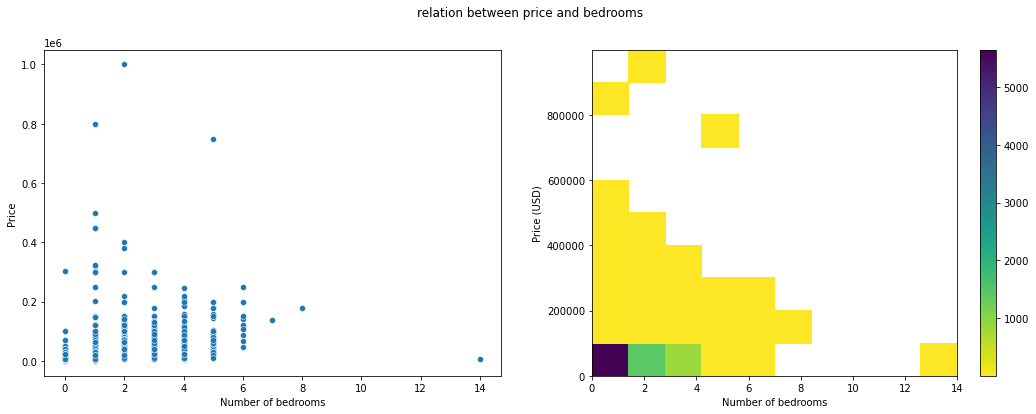

In [13]:
# The relation between price and bedrooms 
plot_scatter_heat(df, 'price', 'bedrooms')

Price increases with the increase of the Number of bedrooms.

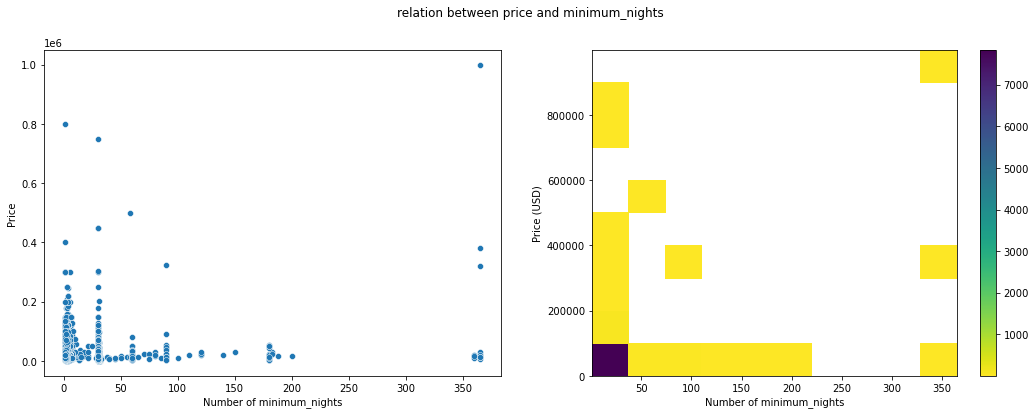

In [14]:
# The relation between price and minimum nights 
plot_scatter_heat(df, 'price', 'minimum_nights')

Number of minimum nights less than a week and near to month are more common and higher in prices.

##### Now let's take a look at the relationship between price and the other two categorical features

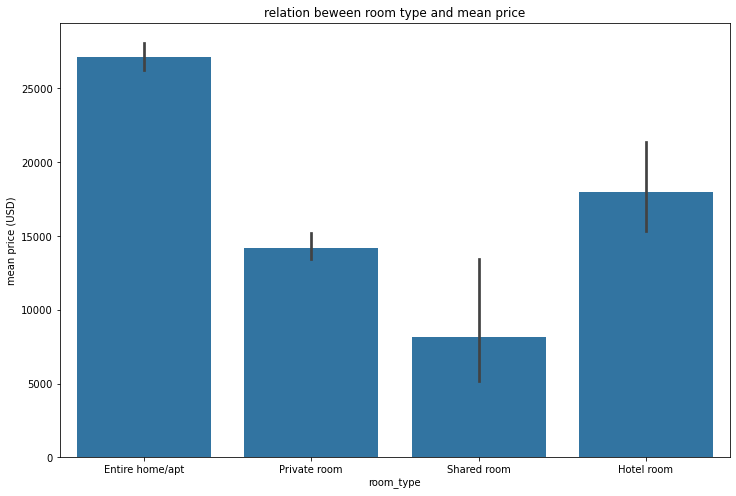

In [15]:
# The relation beween room type and mean price
base_color = sns.color_palette()[0]
sns.barplot(data =df, x= 'room_type', y= 'price', color= base_color)
plt.ylabel('mean price (USD)')
plt.title('relation beween room type and mean price');

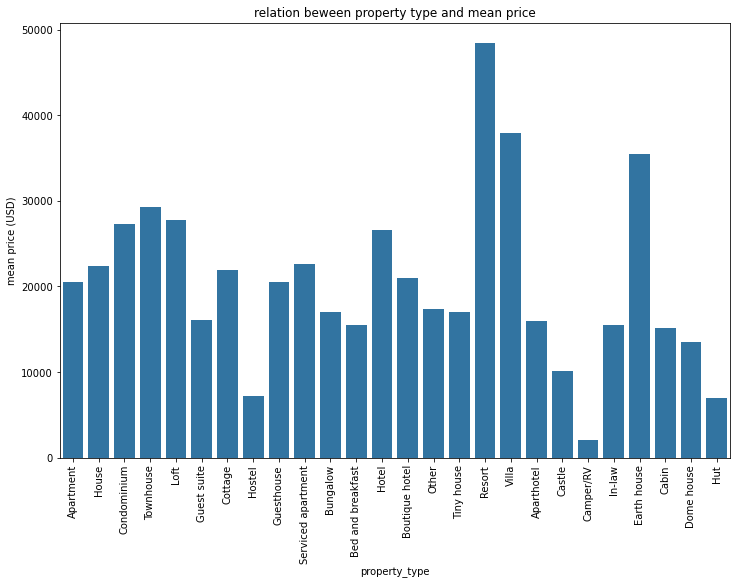

In [16]:
# The relation beween property type and price 
base_color = sns.color_palette()[0]
sns.barplot(data =df, x= 'property_type', y= 'price', color= base_color, ci=False)
plt.xticks(rotation=90)
plt.ylabel('mean price (USD)')
plt.title('relation beween property type and mean price');

There is a relationship between price property types of Resort, Villa, Earth house, and the room type of Entire home/apt as they have the higest mean prices

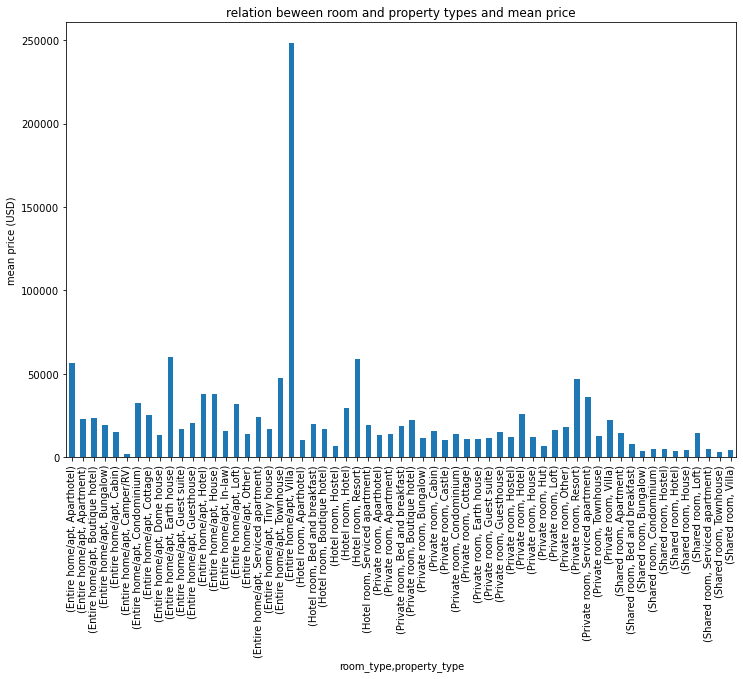

In [17]:
# Relation between room type, property type and mean price
df.groupby(['room_type','property_type'])['price'].mean().plot(kind= 'bar')
plt.ylabel('mean price (USD)')
plt.title('relation beween room and property types and mean price');

The two combinations of Entire home/apt and villa has higest prices.

### Multivariate Exploration

##### Lets create a plot of the relationship between price, bathrooms, bedrooms, and room types

In [18]:
# Define a function plot_line_category() 
def plot_scatter_category(df, price, column, categroy):
    """ Shows the relation between price and the other numerical column according to a specefic category type using a scaterplot"""
    plt.figure(figsize = [18, 6])
    plt.title('relation between price and ' + column + ' by ' + categroy);
    sns.scatterplot(data = df, x = column, y = price, hue=categroy ,ci=False)
    plt.xlabel('Number of '+ column)
    plt.ylabel('Price (USD)')

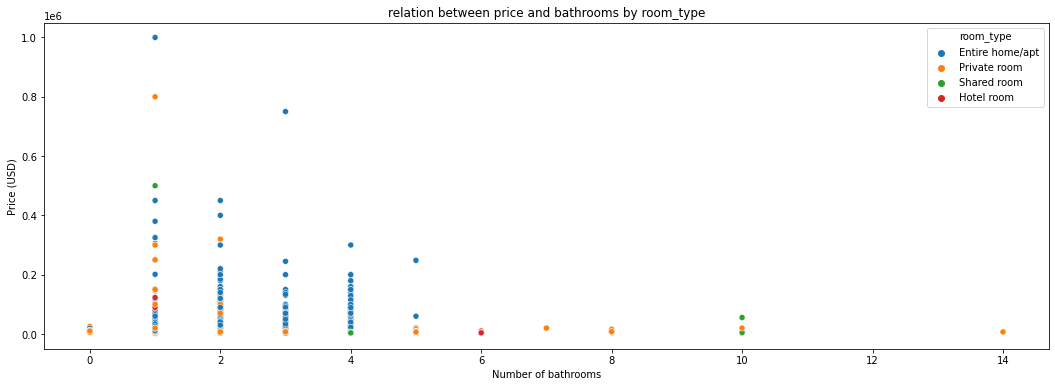

In [19]:
plot_scatter_category(df, 'price', 'bathrooms', 'room_type')

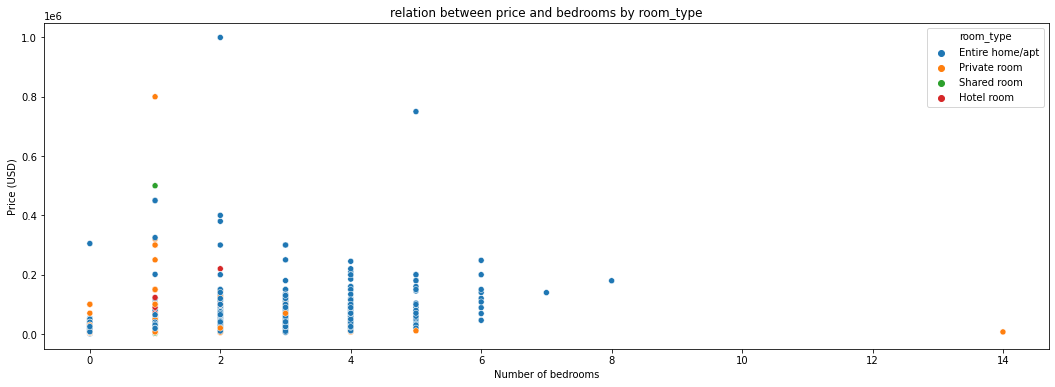

In [20]:
plot_scatter_category(df, 'price', 'bedrooms', 'room_type')

##### To brief 
Form the bivariate relationships. We saw that Price increases with the increase of the Number of bedrooms. From the multivariate exploration we know that this differs according to different category types of room and property, The Entire home/apt was the room type was the only one to increase in price when bathroom and bedroom numbers increases.

We also saw that there was a relationship between price property types of Resort, Villa, Earth house, and the room type of Entire home/apt as they have the higest mean prices. and the two combinations of Entire home/apt and villa has higest prices.